In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Prasad\Downloads\Term_Project.csv'
data = pd.read_csv(file_path)

# Clean and prepare the dataset
data.columns = ['Year', 'District_number', 'District', 'Reporting_total', 'Returning_students', 'Graduates', 
                'Previous_graduates', 'Other_leavers', 'Movers', 'TxCHSE_recipients', 'Dropouts', 
                'Underreported', 'Underreported_Student_Rate']

# Convert numeric columns to appropriate data types
data['Dropouts'] = pd.to_numeric(data['Dropouts'], errors='coerce')
data['Returning_students'] = pd.to_numeric(data['Returning_students'], errors='coerce')
data['Graduates'] = pd.to_numeric(data['Graduates'], errors='coerce')
data['Movers'] = pd.to_numeric(data['Movers'], errors='coerce')
data['Underreported_Student_Rate'] = pd.to_numeric(data['Underreported_Student_Rate'], errors='coerce')

# Remove any missing data
data_cleaned = data.dropna()

# Output the cleaned data
data_cleaned.head()


,Year,District_number,District,Reporting_total,Returning_students,Graduates,Previous_graduates,Other_leavers,Movers,TxCHSE_recipients,Dropouts,Underreported,Underreported_Student_Rate
0,2022-23,57816,A W BROWN LEADERSHIP ACADEMY,84,34.0,0.0,0.0,1,48.0,0.0,1.0,0,0.0
1,2022-23,57829,A+ ACADEMY,766,578.0,96.0,0.0,13,76.0,0.0,0.0,3,0.4
2,2022-23,101871,A+ UNLIMITED POTENTIAL,130,45.0,0.0,0.0,10,74.0,0.0,0.0,1,0.8
3,2022-23,109901,ABBOTT ISD,126,98.0,19.0,0.0,2,7.0,0.0,0.0,0,0.0
4,2022-23,95901,ABERNATHY ISD,383,279.0,55.0,0.0,10,36.0,1.0,2.0,0,0.0


In [2]:
# Generate summary statistics
summary_stats = data_cleaned.describe()

# Display summary statistics
print(summary_stats)


       District_number  Returning_students    Graduates  Previous_graduates  \
count      3817.000000         3817.000000  3817.000000         3817.000000   
mean     124613.729893          280.159025    52.934766            0.117108   
std       72247.151071          239.707323    48.726198            1.270601   
min        1902.000000           -1.000000    -1.000000           -1.000000   
25%       62902.000000           88.000000    16.000000            0.000000   
50%      116908.000000          209.000000    39.000000            0.000000   
75%      183904.000000          412.000000    78.000000            0.000000   
max      254902.000000          999.000000   508.000000           61.000000   

            Movers  TxCHSE_recipients     Dropouts  Underreported  \
count  3817.000000        3817.000000  3817.000000    3817.000000   
mean     43.049515           0.319623     4.764737       1.764213   
std      62.090747           2.919969    32.467750       4.942908   
min      -1.

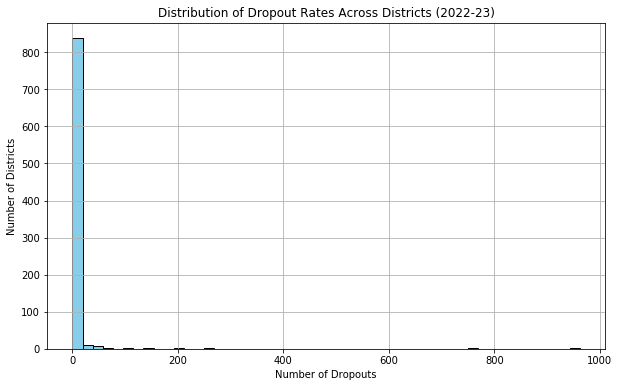

In [4]:
# Visualizing the code
import matplotlib.pyplot as plt

# Filter data for the latest year
latest_year_data = data_cleaned[data_cleaned['Year'] == '2022-23']

# Plot a histogram of dropout rates
plt.figure(figsize=(10,6))
plt.hist(latest_year_data['Dropouts'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Dropout Rates Across Districts (2022-23)')
plt.xlabel('Number of Dropouts')
plt.ylabel('Number of Districts')
plt.grid(True)
plt.show()


In [5]:
# Regression Analysis
import statsmodels.api as sm

# Prepare independent (X) and dependent variables (y)
X = latest_year_data[['Returning_students', 'Graduates', 'Movers']]
y = latest_year_data['Dropouts']

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Dropouts   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     278.4
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          3.07e-126
Time:                        19:44:37   Log-Likelihood:                -4204.1
No. Observations:                 864   AIC:                             8416.
Df Residuals:                     860   BIC:                             8435.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.3698      1

In [6]:
# Compute the correlation matrix
correlation_matrix = latest_year_data[['Dropouts', 'Returning_students', 'Graduates', 'Movers']].corr()

# Display the correlation matrix
print(correlation_matrix)


                    Dropouts  Returning_students  Graduates    Movers
Dropouts            1.000000            0.134749   0.413673  0.335501
Returning_students  0.134749            1.000000   0.887419  0.375253
Graduates           0.413673            0.887419   1.000000  0.365409
Movers              0.335501            0.375253   0.365409  1.000000


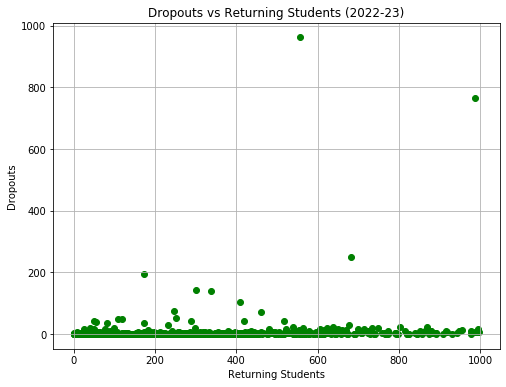

In [7]:
# Scatter plot of Dropouts vs Returning Students
plt.figure(figsize=(8,6))
plt.scatter(latest_year_data['Returning_students'], latest_year_data['Dropouts'], color='green')
plt.title('Dropouts vs Returning Students (2022-23)')
plt.xlabel('Returning Students')
plt.ylabel('Dropouts')
plt.grid(True)
plt.show()


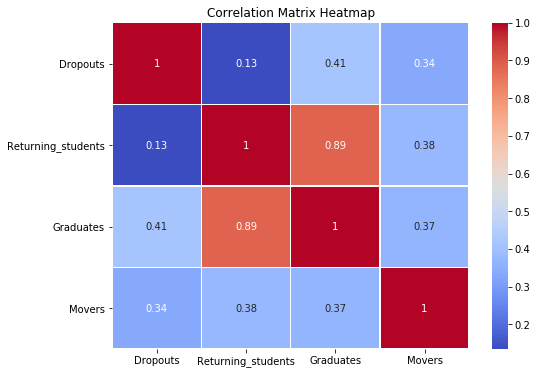

In [8]:
#Advanced Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = latest_year_data[['Dropouts', 'Returning_students', 'Graduates', 'Movers']].corr()

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


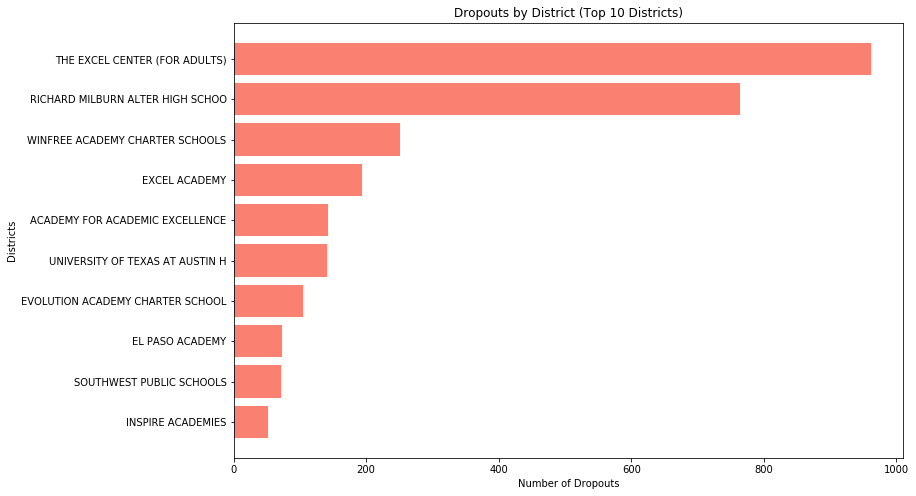

In [11]:
# Sort data by number of dropouts
sorted_data = latest_year_data.sort_values(by='Dropouts', ascending=False)

# Select only the top 10 districts with the highest number of dropouts
top_10_data = sorted_data.head(10)

# Plot bar chart of dropouts by top 10 districts
plt.figure(figsize=(12,8))
plt.barh(top_10_data['District'], top_10_data['Dropouts'], color='salmon')
plt.xlabel('Number of Dropouts')
plt.ylabel('Districts')
plt.title('Dropouts by District (Top 10 Districts)')
plt.gca().invert_yaxis()  # To show highest values at the top
plt.show()



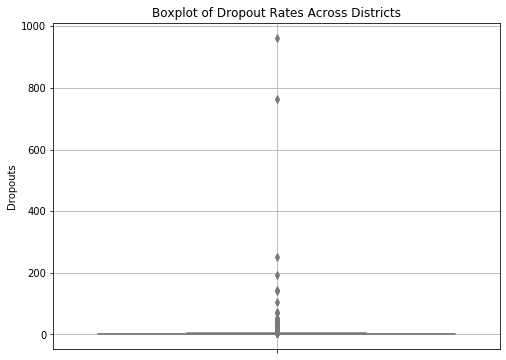

In [12]:
# Boxplot for dropout rates across districts
plt.figure(figsize=(8,6))
sns.boxplot(y=latest_year_data['Dropouts'], color='lightblue')
plt.title('Boxplot of Dropout Rates Across Districts')
plt.ylabel('Dropouts')
plt.grid(True)
plt.show()


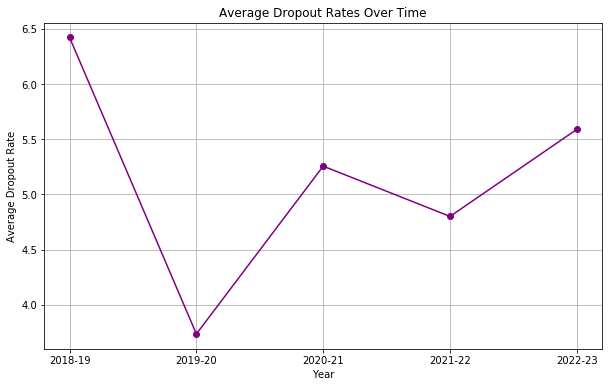

In [13]:
# Group data by year and calculate average dropout rates
dropout_trend = data_cleaned.groupby('Year')['Dropouts'].mean()

# Line plot to show the trend of dropouts over time
plt.figure(figsize=(10,6))
plt.plot(dropout_trend.index, dropout_trend.values, marker='o', linestyle='-', color='purple')
plt.title('Average Dropout Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Average Dropout Rate')
plt.grid(True)
plt.show()


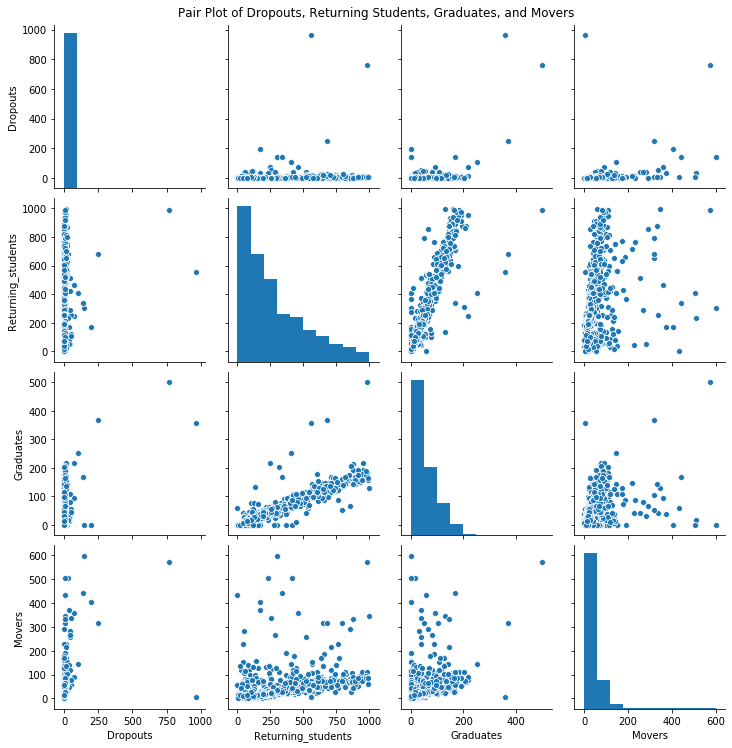

In [14]:
# Create a pair plot to visualize relationships between multiple variables
sns.pairplot(latest_year_data[['Dropouts', 'Returning_students', 'Graduates', 'Movers']])
plt.suptitle('Pair Plot of Dropouts, Returning Students, Graduates, and Movers', y=1.02)
plt.show()


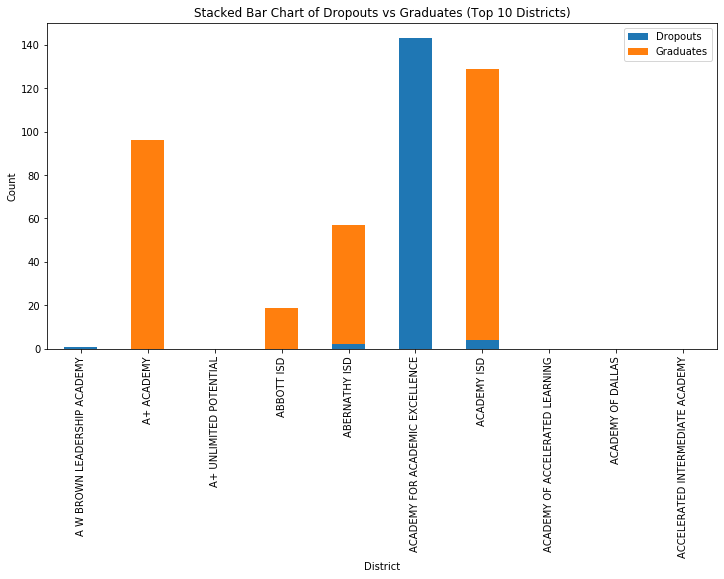

In [15]:
# Create a stacked bar chart to compare Dropouts and Graduates
latest_year_data.set_index('District')[['Dropouts', 'Graduates']].head(10).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Stacked Bar Chart of Dropouts vs Graduates (Top 10 Districts)')
plt.ylabel('Count')
plt.xlabel('District')
plt.legend(loc='upper right')
plt.show()


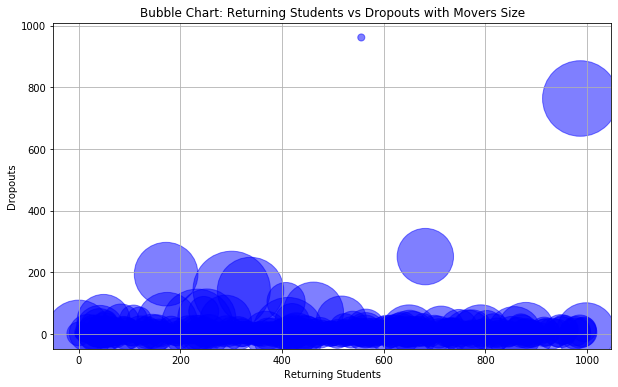

In [16]:
# Create a bubble chart showing dropouts, movers, and returning students
plt.figure(figsize=(10,6))
plt.scatter(latest_year_data['Returning_students'], latest_year_data['Dropouts'], 
            s=latest_year_data['Movers']*10, alpha=0.5, color='blue')

plt.title('Bubble Chart: Returning Students vs Dropouts with Movers Size')
plt.xlabel('Returning Students')
plt.ylabel('Dropouts')
plt.grid(True)
plt.show()


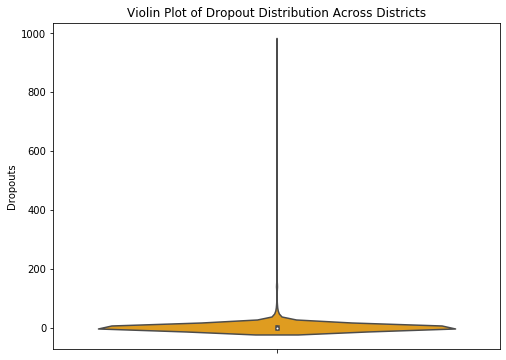

In [17]:
# Violin plot for dropout distribution
plt.figure(figsize=(8,6))
sns.violinplot(y=latest_year_data['Dropouts'], color='orange')
plt.title('Violin Plot of Dropout Distribution Across Districts')
plt.ylabel('Dropouts')
plt.show()


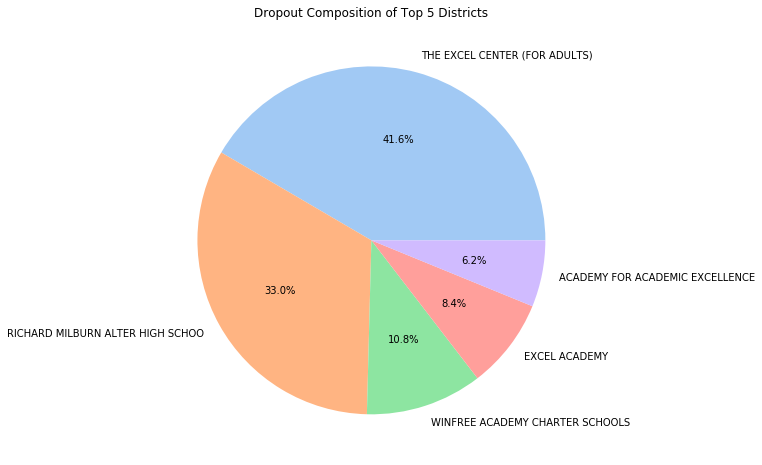

In [18]:
# Select top 5 districts for a clean pie chart
top_5_data = sorted_data.head(5)

# Pie chart of top 5 districts by dropouts
plt.figure(figsize=(8,8))
plt.pie(top_5_data['Dropouts'], labels=top_5_data['District'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Dropout Composition of Top 5 Districts')
plt.show()


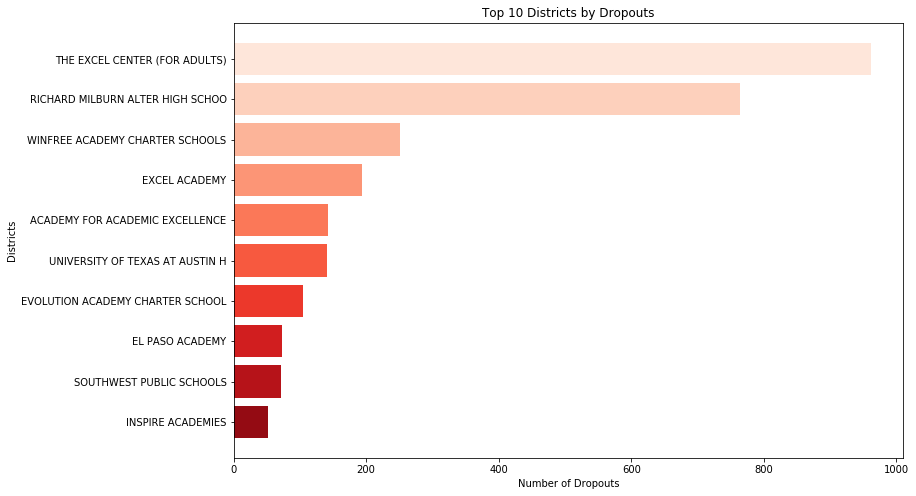

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data and select top 10 districts by dropouts
sorted_data = latest_year_data.sort_values(by='Dropouts', ascending=False)
top_10_data = sorted_data.head(10)

# Bar chart with color gradient
plt.figure(figsize=(12,8))
colors = sns.color_palette("Reds", n_colors=10)
plt.barh(top_10_data['District'], top_10_data['Dropouts'], color=colors)
plt.xlabel('Number of Dropouts')
plt.ylabel('Districts')
plt.title('Top 10 Districts by Dropouts')
plt.gca().invert_yaxis()  # To show highest values at the top
plt.show()


<Figure size 864x576 with 0 Axes>

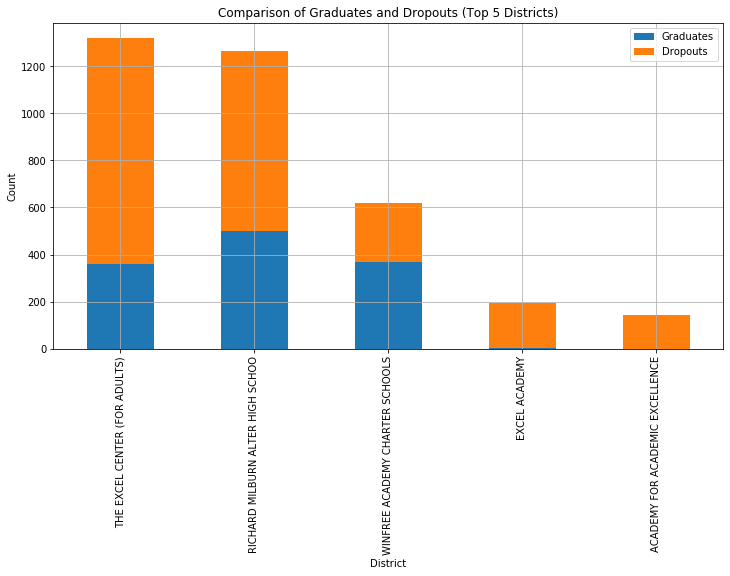

In [20]:
# Stacked bar chart to compare graduates and dropouts for the top 5 districts
plt.figure(figsize=(12,8))
top_5_data.set_index('District')[['Graduates', 'Dropouts']].plot(kind='bar', stacked=True, figsize=(12,6), color=['#1f77b4', '#ff7f0e'])
plt.title('Comparison of Graduates and Dropouts (Top 5 Districts)')
plt.ylabel('Count')
plt.xlabel('District')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


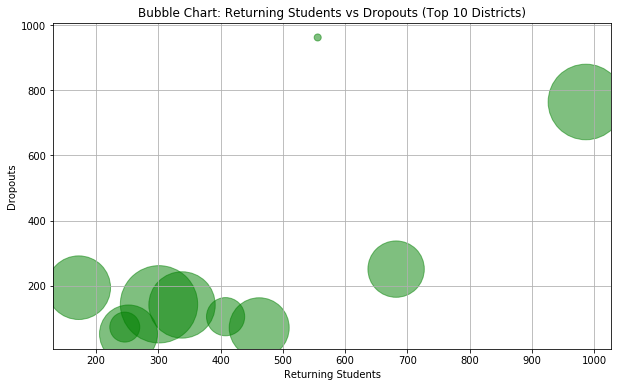

In [21]:
# Bubble chart showing returning students, dropouts, and movers (bubble size)
plt.figure(figsize=(10,6))
plt.scatter(top_10_data['Returning_students'], top_10_data['Dropouts'], 
            s=top_10_data['Movers']*10, alpha=0.5, color='green')

plt.title('Bubble Chart: Returning Students vs Dropouts (Top 10 Districts)')
plt.xlabel('Returning Students')
plt.ylabel('Dropouts')
plt.grid(True)
plt.show()


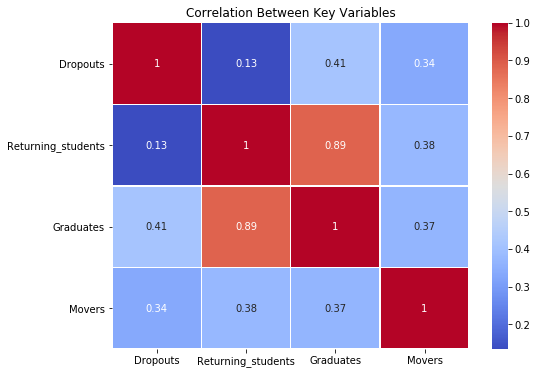

In [22]:
# Correlation heatmap to show relationships between variables
correlation_matrix = latest_year_data[['Dropouts', 'Returning_students', 'Graduates', 'Movers']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Key Variables')
plt.show()


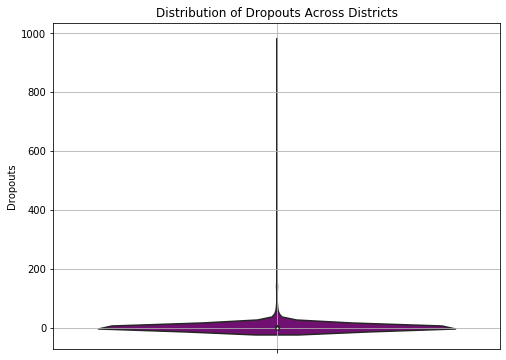

In [23]:
# Violin plot to show dropout distribution
plt.figure(figsize=(8,6))
sns.violinplot(y=latest_year_data['Dropouts'], color='purple')
plt.title('Distribution of Dropouts Across Districts')
plt.ylabel('Dropouts')
plt.grid(True)
plt.show()
